#importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#loading dataset

In [2]:
file_path = r"C:\Users\saite\Downloads\dataset nyc trip data.csv\taxi_trip_data.csv"
df = pd.read_csv(file_path)


#exploring dataset

In [3]:
# Display the first few rows
print(df.head())

# Display basic statistics
print(df.describe())


   vendor_id      pickup_datetime     dropoff_datetime  passenger_count  \
0          2  2018-03-29 13:37:13  2018-03-29 14:17:01                1   
1          2  2018-03-29 13:37:18  2018-03-29 14:15:33                1   
2          2  2018-03-29 13:26:57  2018-03-29 13:28:03                1   
3          2  2018-03-29 13:07:48  2018-03-29 14:03:05                2   
4          2  2018-03-29 14:19:11  2018-03-29 15:19:59                5   

   trip_distance  rate_code store_and_fwd_flag  payment_type  fare_amount  \
0          18.15          3                  N             1         70.0   
1           4.59          1                  N             1         25.0   
2           0.30          1                  N             1          3.0   
3          16.97          1                  N             1         49.5   
4          14.45          1                  N             1         45.5   

   extra  mta_tax  tip_amount  tolls_amount  imp_surcharge  total_amount  \
0    0.0  

#data processing

In [4]:
# Drop rows with missing values
df = df.dropna()

# Select relevant features
X = df[['trip_distance']]
y = df['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#liner regression

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#predict outcomes

In [6]:
y_pred = model.predict(X_test)


#evaluate model

In [7]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 233.58


#Full Notebook Example

Mean Squared Error: 233.33


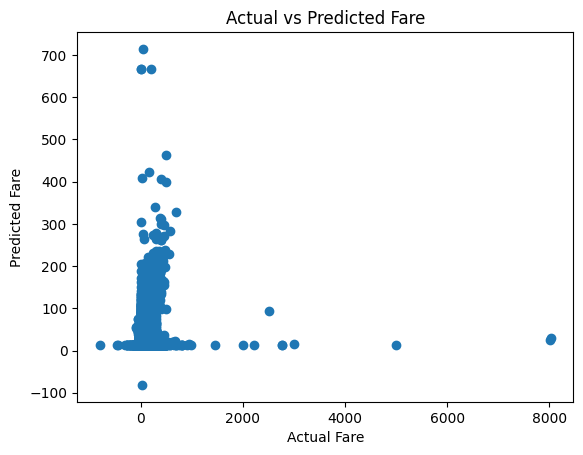

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load Dataset
file_path = r"C:\Users\saite\Downloads\dataset nyc trip data.csv\taxi_trip_data.csv"
df = pd.read_csv(file_path)

# Convert pickup and dropoff datetime columns to datetime type
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Create trip duration feature (duration in minutes)
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60

# Select relevant features
features = ['trip_distance', 'trip_duration']
X = df[features]
y = df['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model using Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict outcomes
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.show()
